In [13]:
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Machine Learning models
from sklearn.ensemble import RandomForestClassifier
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
# Load the Train.csv dataset
df = pd.read_csv('/content/Train.csv')

In [15]:
# View the first few rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
# Get the shape of the dataset
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (5635, 21)


In [17]:
# Check for missing values
print(df.isnull().sum())


customerID           0
gender               0
SeniorCitizen        7
Partner              0
Dependents           0
tenure              13
PhoneService        13
MultipleLines       13
InternetService     37
OnlineSecurity      15
OnlineBackup        15
DeviceProtection    15
TechSupport         15
StreamingTV         22
StreamingMovies     14
Contract            25
PaperlessBilling    14
PaymentMethod        1
MonthlyCharges      16
TotalCharges         7
Churn                0
dtype: int64


In [73]:

# Imputation based on the above analysis

# Impute 'SeniorCitizen' with mode
df['SeniorCitizen'].fillna(df['SeniorCitizen'].mode()[0], inplace=True)

In [74]:
# Impute 'tenure' with median
df['tenure'].fillna(df['tenure'].median(), inplace=True)


In [76]:
# Impute 'PhoneService' and 'MultipleLines' with mode
df['PhoneService'].fillna(df['PhoneService'].mode()[0], inplace=True)
df['MultipleLines'].fillna(df['MultipleLines'].mode()[0], inplace=True)

In [77]:
# Impute 'InternetService' with mode
df['InternetService'].fillna(df['InternetService'].mode()[0], inplace=True)


In [78]:
# Impute online service features with mode
online_features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
for feature in online_features:
    df[feature].fillna(df[feature].mode()[0], inplace=True)


In [79]:

# Impute 'StreamingTV' and 'StreamingMovies' with mode
df['StreamingTV'].fillna(df['StreamingTV'].mode()[0], inplace=True)
df['StreamingMovies'].fillna(df['StreamingMovies'].mode()[0], inplace=True)

In [80]:
# Impute 'Contract' with mode
df['Contract'].fillna(df['Contract'].mode()[0], inplace=True)


In [81]:
# Impute 'PaperlessBilling' with mode
df['PaperlessBilling'].fillna(df['PaperlessBilling'].mode()[0], inplace=True)

In [82]:
# Impute 'PaymentMethod' with mode
df['PaymentMethod'].fillna(df['PaymentMethod'].mode()[0], inplace=True)

In [83]:
# Impute 'MonthlyCharges' with median
df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(), inplace=True)


In [85]:
# Impute 'TotalCharges' with median
# Convert non-numeric values to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Calculate the median and fill NaN values
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [86]:
# Check for missing values after handling
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [18]:
# Get basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635 entries, 0 to 5634
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5635 non-null   object 
 1   gender            5635 non-null   object 
 2   SeniorCitizen     5628 non-null   float64
 3   Partner           5635 non-null   object 
 4   Dependents        5635 non-null   object 
 5   tenure            5622 non-null   float64
 6   PhoneService      5622 non-null   object 
 7   MultipleLines     5622 non-null   object 
 8   InternetService   5598 non-null   object 
 9   OnlineSecurity    5620 non-null   object 
 10  OnlineBackup      5620 non-null   object 
 11  DeviceProtection  5620 non-null   object 
 12  TechSupport       5620 non-null   object 
 13  StreamingTV       5613 non-null   object 
 14  StreamingMovies   5621 non-null   object 
 15  Contract          5610 non-null   object 
 16  PaperlessBilling  5621 non-null   object 


In [19]:
# Get statistical summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5628.000000,5622.000000,5619.000000
mean,0.160270,32.286375,64.854983
std,0.366889,24.591460,30.105189
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.550000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


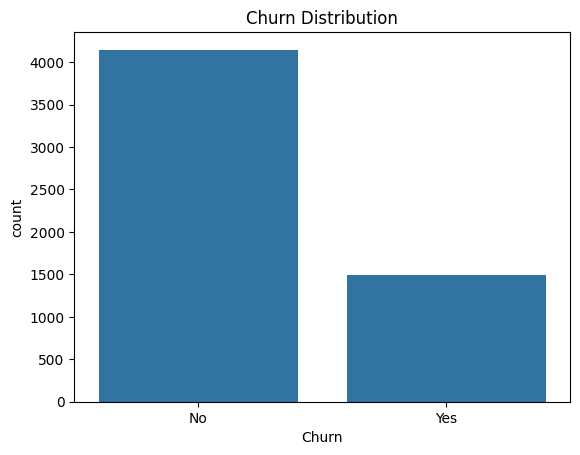

In [20]:
# Plotting churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

In [89]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns


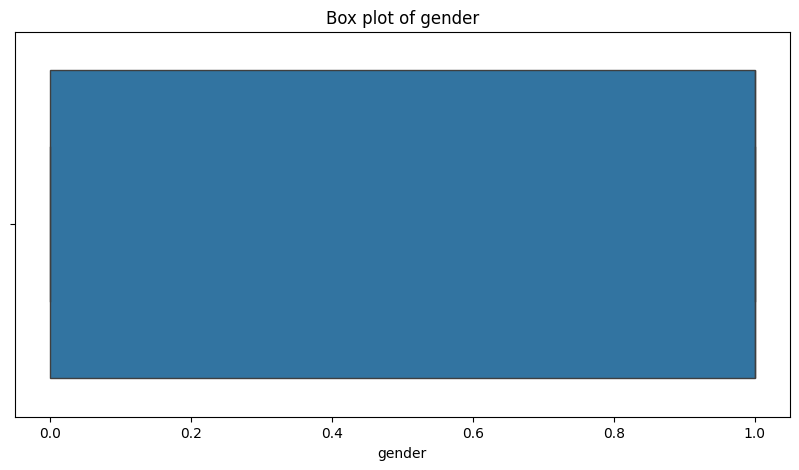

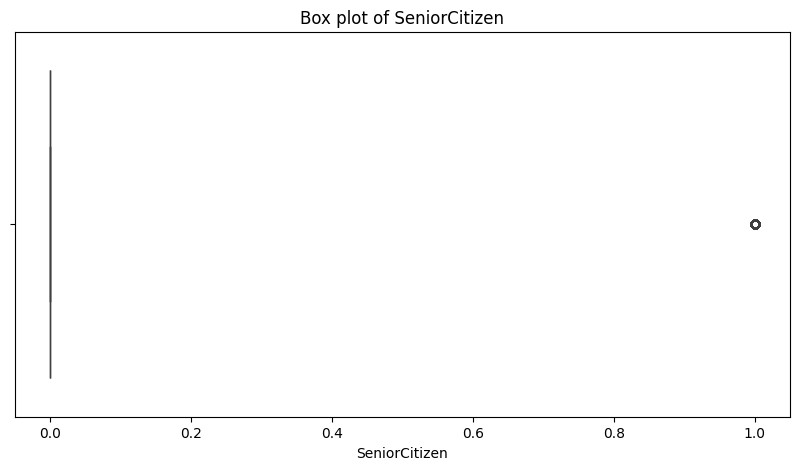

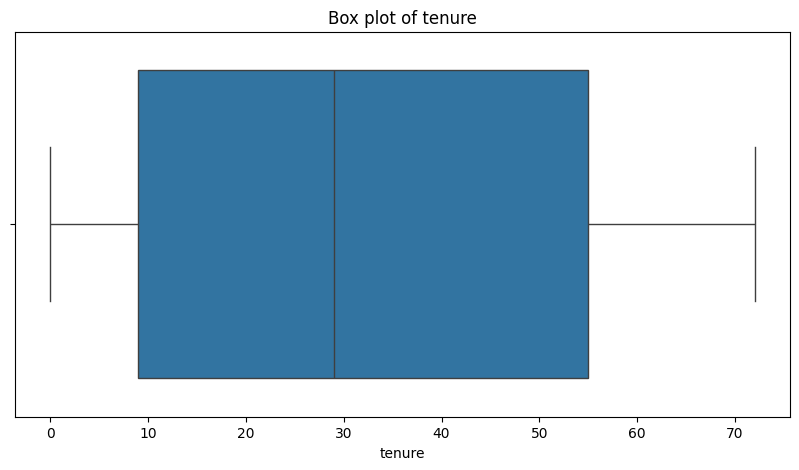

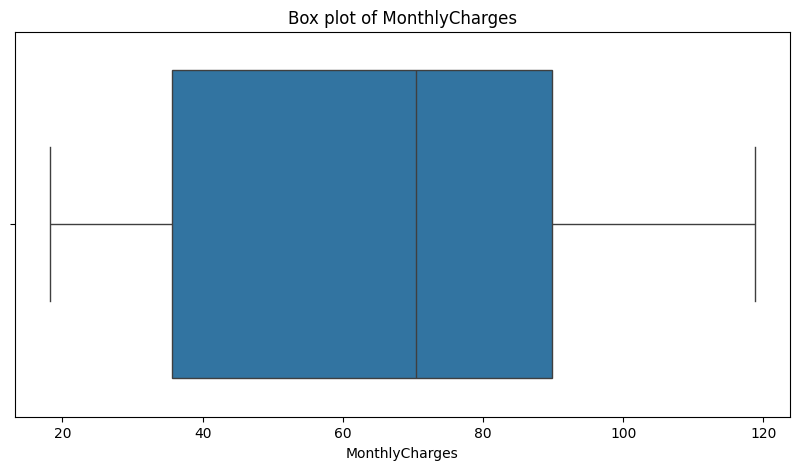

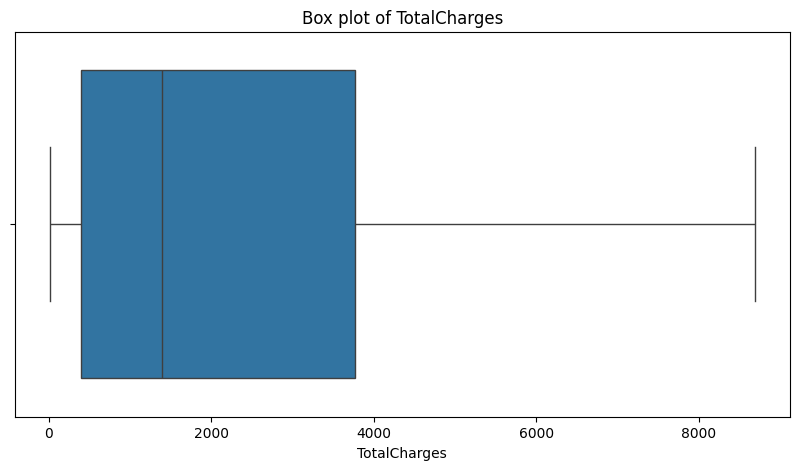

In [90]:
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()


In [91]:
def identify_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]


In [92]:
outliers_dict = {}
for col in numerical_cols:
    outliers = identify_outliers_iqr(df[col])
    outliers_dict[col] = outliers


In [93]:
for col, outliers in outliers_dict.items():
    print(f'Outliers in {col}: {len(outliers)}')


Outliers in gender: 0
Outliers in SeniorCitizen: 902
Outliers in tenure: 0
Outliers in MonthlyCharges: 0
Outliers in TotalCharges: 0


In [94]:
def cap_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data.clip(lower_bound, upper_bound)


In [95]:
for col in numerical_cols:
    df[col] = cap_outliers(df[col])


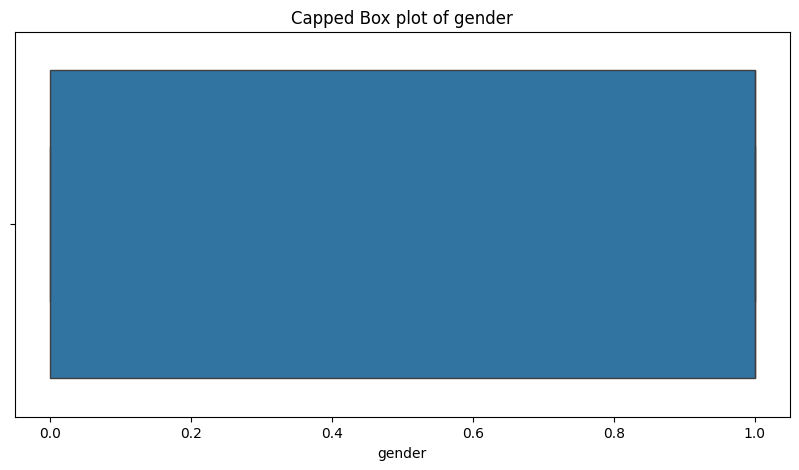

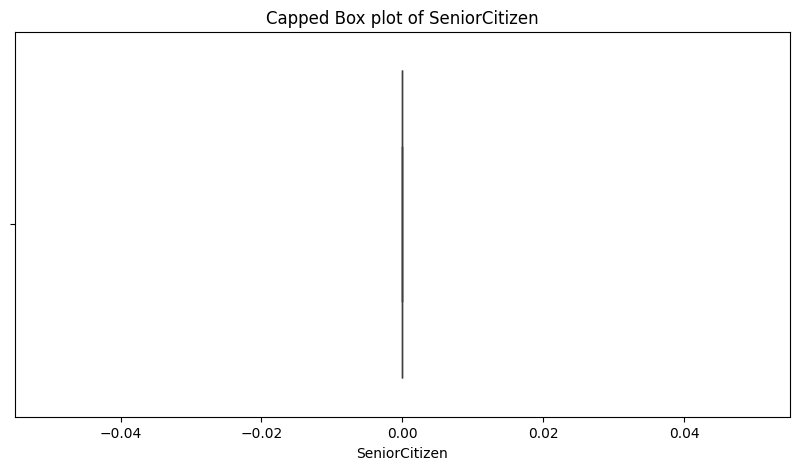

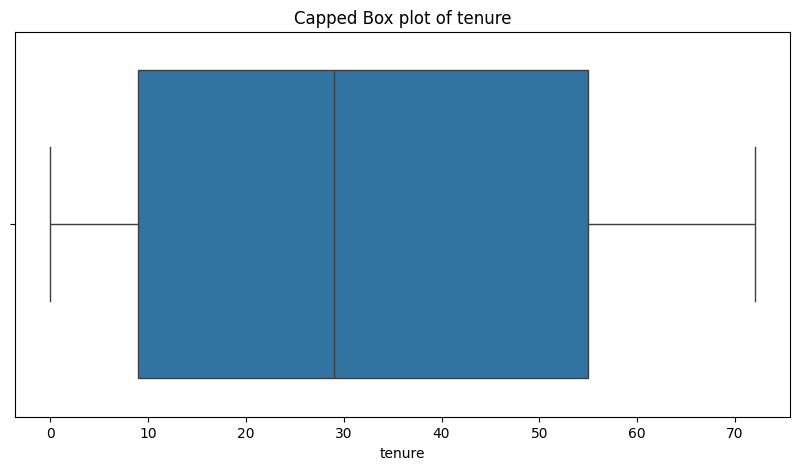

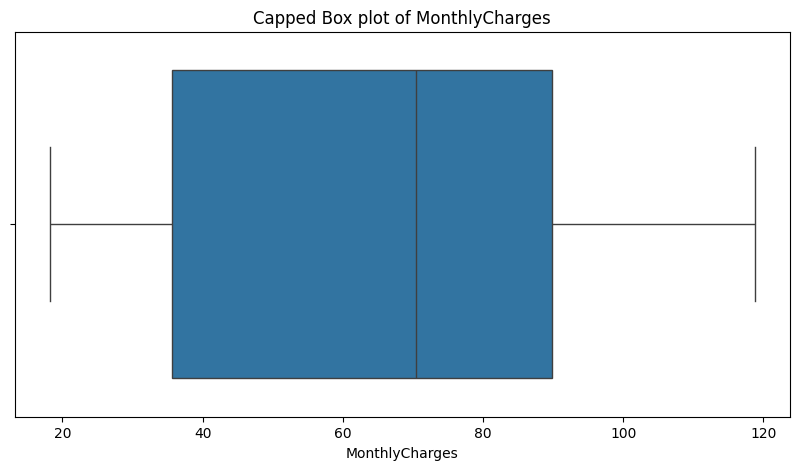

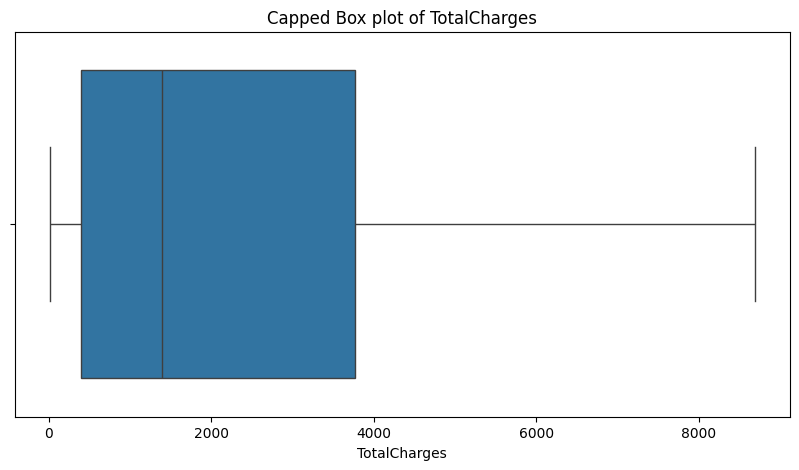

In [96]:
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Capped Box plot of {col}')
    plt.show()


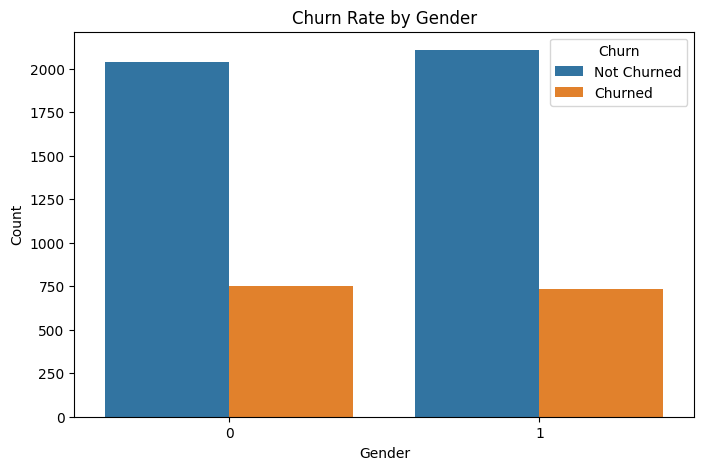

In [98]:
# Bar plot of churn rate by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()


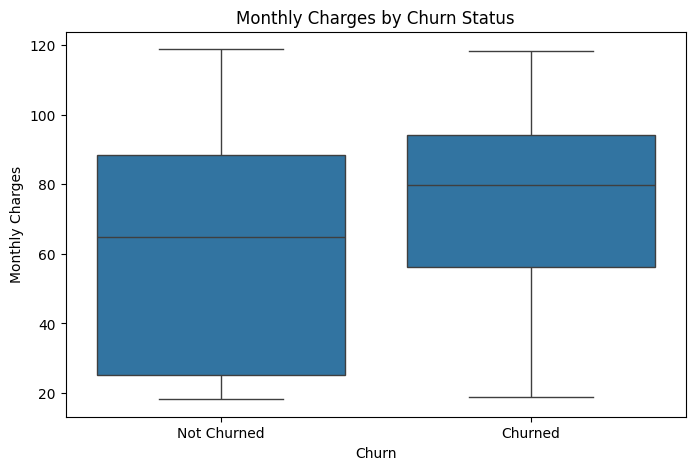

In [99]:
# Box plot of Monthly Charges by Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'])
plt.show()


In [100]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['gender'], df['Churn'])

# Perform Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2 Stat: {chi2}, p-value: {p}')


Chi2 Stat: 0.9044261169373627, p-value: 0.3415976723576357


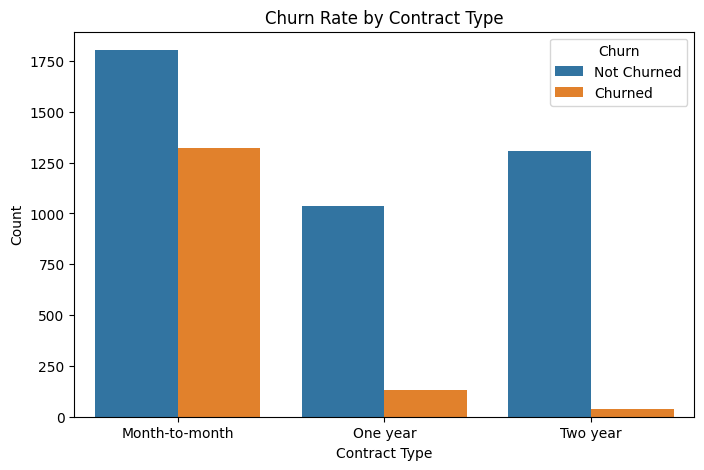

In [101]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()


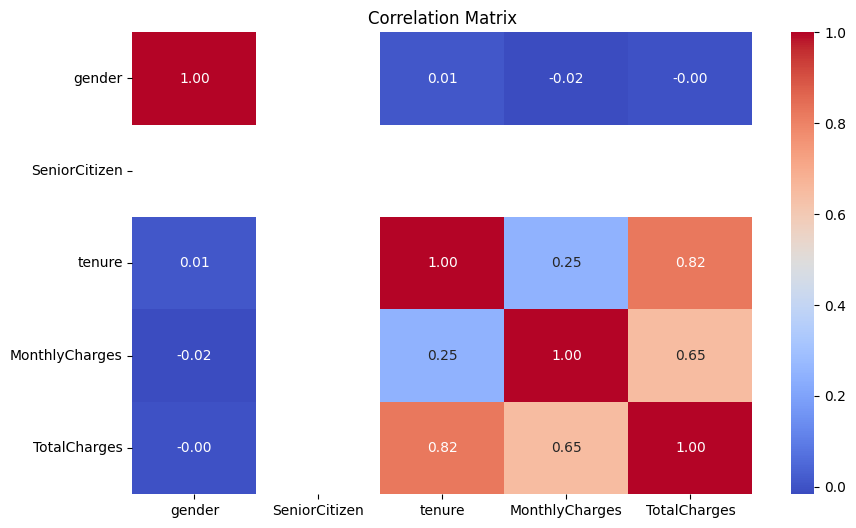

In [102]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [25]:
# Fill missing values in numerical columns with the median
for col in df.select_dtypes(include=['number']):
    df[col] = df[col].fillna(df[col].median())

In [28]:
# Label encode categorical features
label_encoder = LabelEncoder()

# Assuming columns like 'gender', 'contract_type', 'payment_method' are categorical
categorical_features = ['gender', 'contract_type', 'payment_method']



In [30]:
# Encode categorical variables into numerical format
for col in categorical_features:
    # Check if the column exists in the DataFrame before encoding
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])
    else:
        print(f"Column '{col}' not found in DataFrame.")

Column 'contract_type' not found in DataFrame.
Column 'payment_method' not found in DataFrame.


In [31]:
# Define X (features) and y (target)
X = df.drop('Churn', axis=1)  # Features (everything except 'Churn')
y = df['Churn']  # Target (whether the customer churned)


In [32]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Print the shape of the splits
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (4508, 20), Test set: (1127, 20)


In [34]:
# Initialize the scaler
scaler = StandardScaler()


In [87]:
# Select only numerical features for scaling
numerical_features = X_train.select_dtypes(include=['number']).columns

# Scale the training and testing data using only numerical features
X_train_scaled = scaler.fit_transform(X_train[numerical_features])  # Fit to train data and transform it
X_test_scaled = scaler.transform(X_test[numerical_features])        # Transform test data using same parameters

In [37]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)


In [38]:
# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test_scaled)


In [40]:
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7506654835847383


In [41]:

# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[699 123]
 [158 147]]


In [42]:

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.85      0.83       822
         Yes       0.54      0.48      0.51       305

    accuracy                           0.75      1127
   macro avg       0.68      0.67      0.67      1127
weighted avg       0.74      0.75      0.75      1127



In [55]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [56]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)


In [57]:
# Perform grid search on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [58]:
# Get the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [59]:
# Use the best model from grid search to make predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)


In [60]:

# Evaluate the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy after tuning: {accuracy_best}")

Accuracy after tuning: 0.7799467613132209


In [43]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression

In [44]:
# Initialize Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [45]:
# Predict on the test set
y_pred = logreg_model.predict(X_test_scaled)


In [46]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7755102040816326


In [47]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[747  75]
 [178 127]]


In [48]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          No       0.81      0.91      0.86       822
         Yes       0.63      0.42      0.50       305

    accuracy                           0.78      1127
   macro avg       0.72      0.66      0.68      1127
weighted avg       0.76      0.78      0.76      1127



In [49]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Type of regularization (L1 or L2)
    'solver': ['liblinear']         # Solver must match the penalty type
}

In [50]:
# Initialize grid search
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)


In [51]:

# Fit grid search to the training data
grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             verbose=1)

In [52]:

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [53]:

# Use the best model from grid search to make predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

In [54]:
# Evaluate tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy after tuning: {accuracy_best}")

Accuracy after tuning: 0.769299023957409


In [61]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier


In [62]:
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=42)

In [63]:
# Predict on the test set
y_pred = dt_model.predict(X_test_scaled)


In [64]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


In [65]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[660 162]
 [170 135]]


In [66]:
# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

          No       0.80      0.80      0.80       822
         Yes       0.45      0.44      0.45       305

    accuracy                           0.71      1127
   macro avg       0.62      0.62      0.62      1127
weighted avg       0.70      0.71      0.70      1127



In [67]:
# SVM model
from sklearn.svm import SVC

In [68]:
# Initialize the SVM Classifier
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)


SVC(random_state=42)

In [69]:
# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)


In [70]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.77


In [71]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[754  68]
 [192 113]]


In [88]:
# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

          No       0.80      0.92      0.85       822
         Yes       0.62      0.37      0.47       305

    accuracy                           0.77      1127
   macro avg       0.71      0.64      0.66      1127
weighted avg       0.75      0.77      0.75      1127



tuned model of random forest classifier shows an accuracy of 0.78